In [1]:
# URL for Kaggle Dataset: https://www.kaggle.com/datasets/jackdaoud/marketing-data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
import sklearn.datasets._california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

ma = pd.read_csv("https://raw.githubusercontent.com/rygielcorpuz/machinelearning/main/ifood_df.csv")

In [3]:
ma.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
# Check for null values
null_values = ma.isnull()
# Count null values in each column
null_count = ma.isnull().sum()

print("Check for Null Values: " , null_values)
print("Check for null values in each column: " , null_count)

Check for Null Values:        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      False    False     False    False     False      False   
1      False    False     False    False     False      False   
2      False    False     False    False     False      False   
3      False    False     False    False     False      False   
4      False    False     False    False     False      False   
...      ...      ...       ...      ...       ...        ...   
2200   False    False     False    False     False      False   
2201   False    False     False    False     False      False   
2202   False    False     False    False     False      False   
2203   False    False     False    False     False      False   
2204   False    False     False    False     False      False   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0               False            False             False         False  ...   
1               False            Fals

In [5]:
# Since there is no data being seen that has a NULL value
# There is no need for data cleansing / Handling Null values

In [6]:
print(ma.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [7]:
# Check data types of all columns
data_types = ma.dtypes
categorical_attributes = data_types[data_types == 'object'].index.tolist()

print(data_types)
print(categorical_attributes)

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

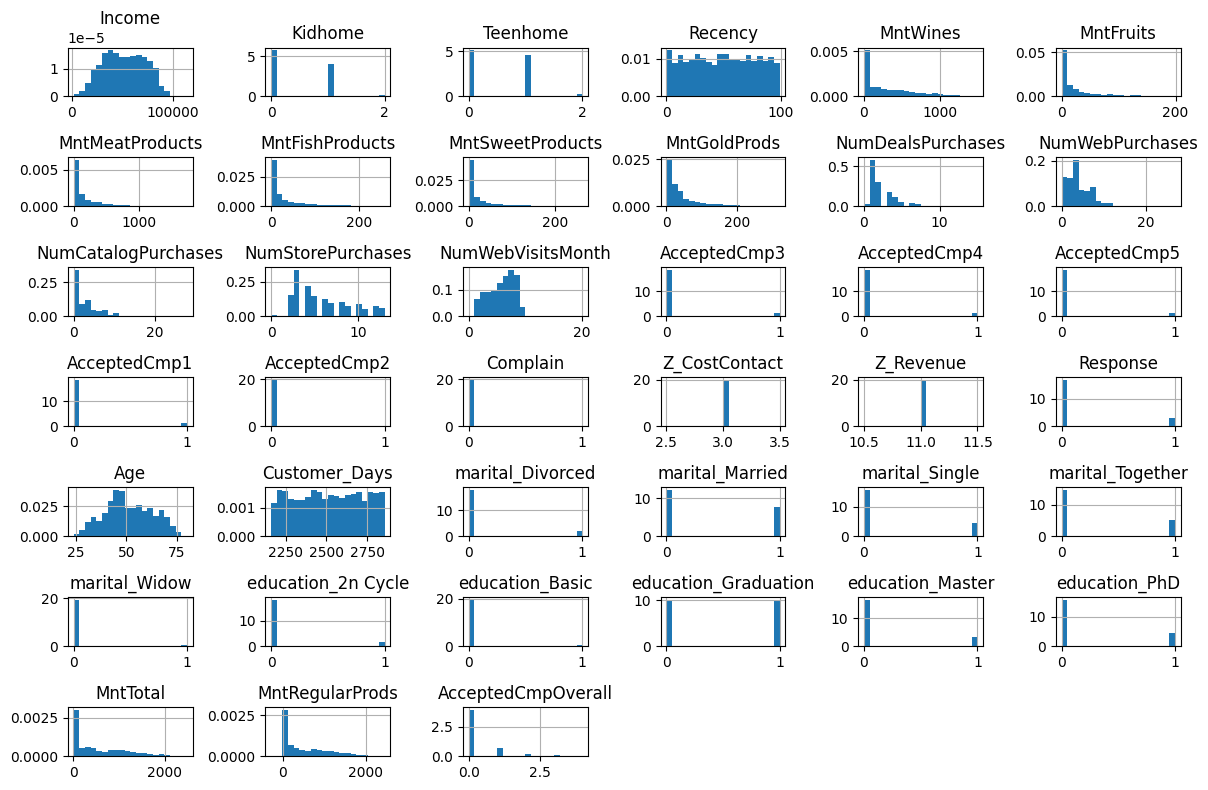

In [8]:
# Nothing in Categorical Attributes since everything is an int or float and no obj
# Moving forward

# Create histograms for all numerical attributes
ma.hist(bins= 20, density = True, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [9]:
# Standardizing the Values now
# Standardized Value = (Original Value - Mean of Attribute) / (Standard Deviation of Attribute)

# Getting the columns to standardize
columns_standardize = ma.columns

print(columns_standardize)
print(ma[columns_standardize])

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')
       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26      

In [10]:
# Initializing the Standard Scaler
scaler = StandardScaler()

# Fit the transforming data
ma[columns_standardize] = scaler.fit_transform(ma[columns_standardize])

print(ma[columns_standardize])

        Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0     0.314651 -0.823405 -0.930767  0.310830  0.974566   1.548614   
1    -0.254877  1.038757  0.906602 -0.380600 -0.874776  -0.638664   
2     0.965354 -0.823405 -0.930767 -0.795458  0.355155   0.568110   
3    -1.206087  1.038757 -0.930767 -0.795458 -0.874776  -0.563241   
4     0.322136  1.038757 -0.930767  1.555404 -0.394659   0.417263   
...        ...       ...       ...       ...       ...        ...   
2200  0.463624 -0.823405  0.906602 -0.104028  1.193879   0.417263   
2201  0.598401  2.900920  0.906602  0.241687  0.295881  -0.663806   
2202  0.258780 -0.823405 -0.930767  1.451690  1.783653   0.542969   
2203  0.851004 -0.823405  0.906602 -1.417746  0.361082   0.090428   
2204  0.060213  1.038757  0.906602 -0.311457 -0.658427  -0.588382   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0            1.748400         2.449154          1.480301      0.849556  ...   
1           -

In [11]:
ma.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,...,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,1.678056,1.665625,-0.439991
1,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,...,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,-0.940880,-0.909676,-0.439991
2,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,...,1.697658,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,0.297384,0.312960,-0.439991
3,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,...,1.697658,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,-0.893989,-0.859109,-0.439991
4,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,...,-0.589047,-0.188938,-0.314093,-0.158444,-1.009570,-0.444656,1.905873,-0.270516,-0.228829,-0.439991


In [12]:
# Normalizing the Values now
# Normalization Value = (Original Value - Min of Attribute) / (Max of Attribute - Min of Attribute)

# Getting the columns to normalize
columns_normalize = ma.columns

ma[columns_normalize] = (ma[columns_normalize] - ma[columns_normalize].min()) / (ma[columns_normalize].max() - ma[columns_normalize].min())


In [13]:
# To check if Standardization has worked // Mean Values should be close to 0 and STD should be close to 1

mean_values = ma[columns_standardize].mean()
std_dev_values = ma[columns_standardize].std()

print("Mean Values:\n", mean_values)
print("Standard Deviation Values:\n", std_dev_values)

Mean Values:
 Income                  0.445449
Kidhome                 0.221088
Teenhome                0.253288
Recency                 0.495041
MntWines                0.205067
MntFruits               0.132679
MntMeatProducts         0.095833
MntFishProducts         0.145778
MntSweetProducts        0.103543
MntGoldProds            0.137250
NumDealsPurchases       0.154558
NumWebPurchases         0.151877
NumCatalogPurchases     0.094477
NumStorePurchases       0.447968
NumWebVisitsMonth       0.266848
AcceptedCmp3            0.073923
AcceptedCmp4            0.074376
AcceptedCmp5            0.073016
AcceptedCmp1            0.064399
AcceptedCmp2            0.013605
Complain                0.009070
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.151020
Age                     0.483852
Customer_Days           0.506035
marital_Divorced        0.104308
marital_Married         0.387302
marital_Single          0.216327
marital_Together        0.257

In [14]:
"""
Found out that Z_ConstContact and Z_Revenue is a 0 column which is setting all the statistics to NaN
We will be removing the Z_CostContact and Z_Revenue to keep a consistent dataframe w/o NaN

"""

'\nFound out that Z_ConstContact and Z_Revenue is a 0 column which is setting all the statistics to NaN\nWe will be removing the Z_CostContact and Z_Revenue to keep a consistent dataframe w/o NaN\n\n'

In [15]:
mean_values = ma[columns_standardize].mean()
std_dev_values = ma[columns_standardize].std()

print("Mean Values:\n", mean_values)
print("Standard Deviation Values:\n", std_dev_values)


Mean Values:
 Income                  0.445449
Kidhome                 0.221088
Teenhome                0.253288
Recency                 0.495041
MntWines                0.205067
MntFruits               0.132679
MntMeatProducts         0.095833
MntFishProducts         0.145778
MntSweetProducts        0.103543
MntGoldProds            0.137250
NumDealsPurchases       0.154558
NumWebPurchases         0.151877
NumCatalogPurchases     0.094477
NumStorePurchases       0.447968
NumWebVisitsMonth       0.266848
AcceptedCmp3            0.073923
AcceptedCmp4            0.074376
AcceptedCmp5            0.073016
AcceptedCmp1            0.064399
AcceptedCmp2            0.013605
Complain                0.009070
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.151020
Age                     0.483852
Customer_Days           0.506035
marital_Divorced        0.104308
marital_Married         0.387302
marital_Single          0.216327
marital_Together        0.257

In [16]:
# Replace alternative NaN representations with standard NaN
ma['Z_CostContact'].replace(['None', 'N/A', ''], np.nan, inplace=True)
ma['Z_Revenue'].replace(['None', 'N/A', ''], np.nan, inplace=True)

# Now fill NaN values with their respective mean values
ma['Z_CostContact'].fillna(mean_values['Z_CostContact'], inplace=True)
ma['Z_Revenue'].fillna(mean_values['Z_Revenue'], inplace=True)

In [17]:
print(ma)

        Income  Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0     0.503625      0.0       0.0  0.585859  0.425318   0.442211   
1     0.398325      0.5       0.5  0.383838  0.007368   0.005025   
2     0.623933      0.0       0.0  0.262626  0.285332   0.246231   
3     0.222456      0.5       0.0  0.262626  0.007368   0.020101   
4     0.505009      0.5       0.0  0.949495  0.115874   0.216080   
...        ...      ...       ...       ...       ...        ...   
2200  0.531169      0.0       0.5  0.464646  0.474883   0.216080   
2201  0.556087      1.0       0.5  0.565657  0.271936   0.000000   
2202  0.493295      0.0       0.0  0.919192  0.608171   0.241206   
2203  0.602791      0.0       0.5  0.080808  0.286671   0.150754   
2204  0.456582      0.5       0.5  0.404040  0.056263   0.015075   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0            0.316522         0.664093          0.335878      0.274143  ...   
1            0.003478    

In [18]:
print(ma['Z_CostContact'])
print(ma['Z_Revenue'])


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2200   NaN
2201   NaN
2202   NaN
2203   NaN
2204   NaN
Name: Z_CostContact, Length: 2205, dtype: float64
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2200   NaN
2201   NaN
2202   NaN
2203   NaN
2204   NaN
Name: Z_Revenue, Length: 2205, dtype: float64


In [19]:
print(ma)

        Income  Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0     0.503625      0.0       0.0  0.585859  0.425318   0.442211   
1     0.398325      0.5       0.5  0.383838  0.007368   0.005025   
2     0.623933      0.0       0.0  0.262626  0.285332   0.246231   
3     0.222456      0.5       0.0  0.262626  0.007368   0.020101   
4     0.505009      0.5       0.0  0.949495  0.115874   0.216080   
...        ...      ...       ...       ...       ...        ...   
2200  0.531169      0.0       0.5  0.464646  0.474883   0.216080   
2201  0.556087      1.0       0.5  0.565657  0.271936   0.000000   
2202  0.493295      0.0       0.0  0.919192  0.608171   0.241206   
2203  0.602791      0.0       0.5  0.080808  0.286671   0.150754   
2204  0.456582      0.5       0.5  0.404040  0.056263   0.015075   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0            0.316522         0.664093          0.335878      0.274143  ...   
1            0.003478    

In [20]:
# To get the correlation matrix we use the corr() function:
correlation_ma = ma.corr()

In [21]:
target_corr = ma.corr()['Income']

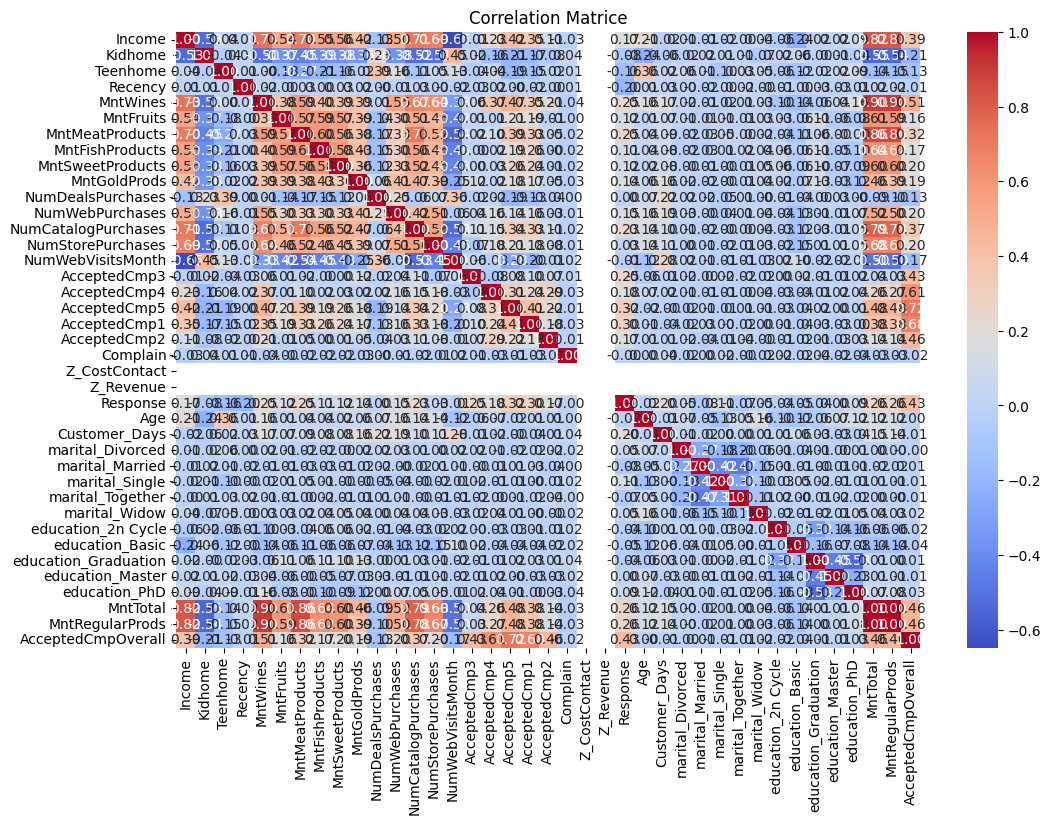

In [22]:
# Time to graph out Matrix

plt.figure(figsize=(12,8))
sns.heatmap(correlation_ma, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrice")
plt.show()

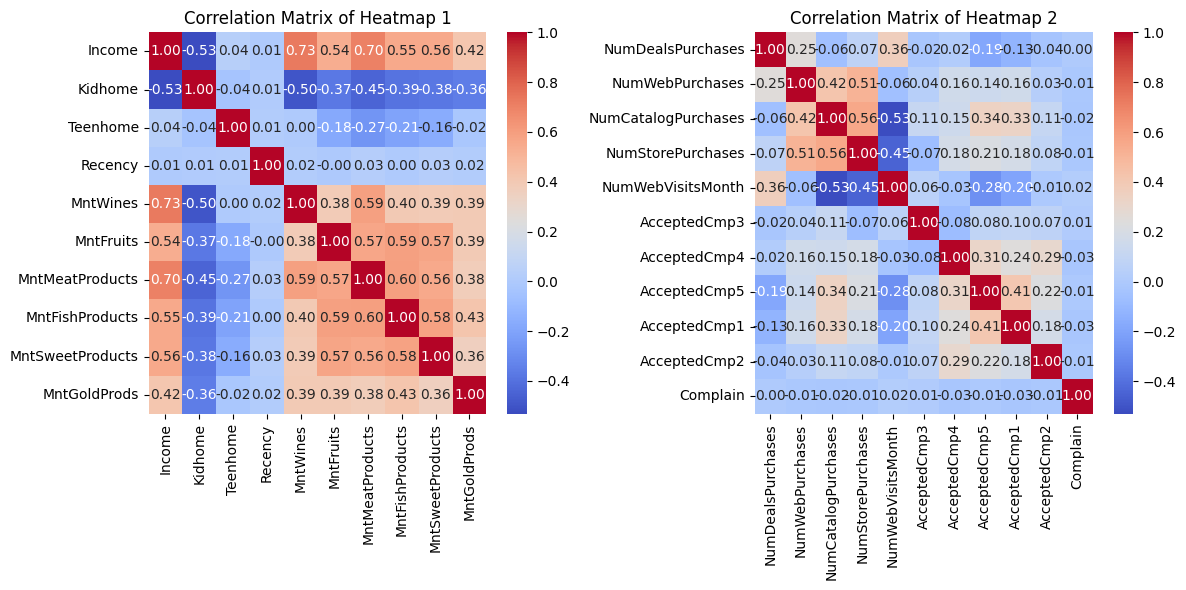

In [23]:
# Since Z_CostContact and Z_Revnue both have values of 0
# and NaN values, we will be making two separate heatmaps

columns_heatmap1 = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

heatmap_data1 = ma[columns_heatmap1]
correlation_matrix1 = heatmap_data1.corr()


columns_heatmap2 =    [ 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
]

heatmap_data2 = ma[columns_heatmap2]
correlation_matrix2 = heatmap_data2.corr()

columns_heatmap3 =  ['Response', 'Age', 'Customer_Days',
    'marital_Divorced', 'marital_Married', 'marital_Together', 'marital_Widow']

heatmap_data3 = ma[columns_heatmap3]
correlation_matrix3 = heatmap_data3.corr()

columns_heatmap4 = ['education_2n Cycle','education_Basic', 'education_Graduation', 'education_PhD', 'MntTotal', 'MntRegularProds',
    'AcceptedCmpOverall'
]

heatmap_data4 = ma[columns_heatmap4]
correlation_matrix4 = heatmap_data4.corr()

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Now Plotting the heatmaps
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix of Heatmap 1")

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Matrix of Heatmap 2")

plt.tight_layout()
plt.show()

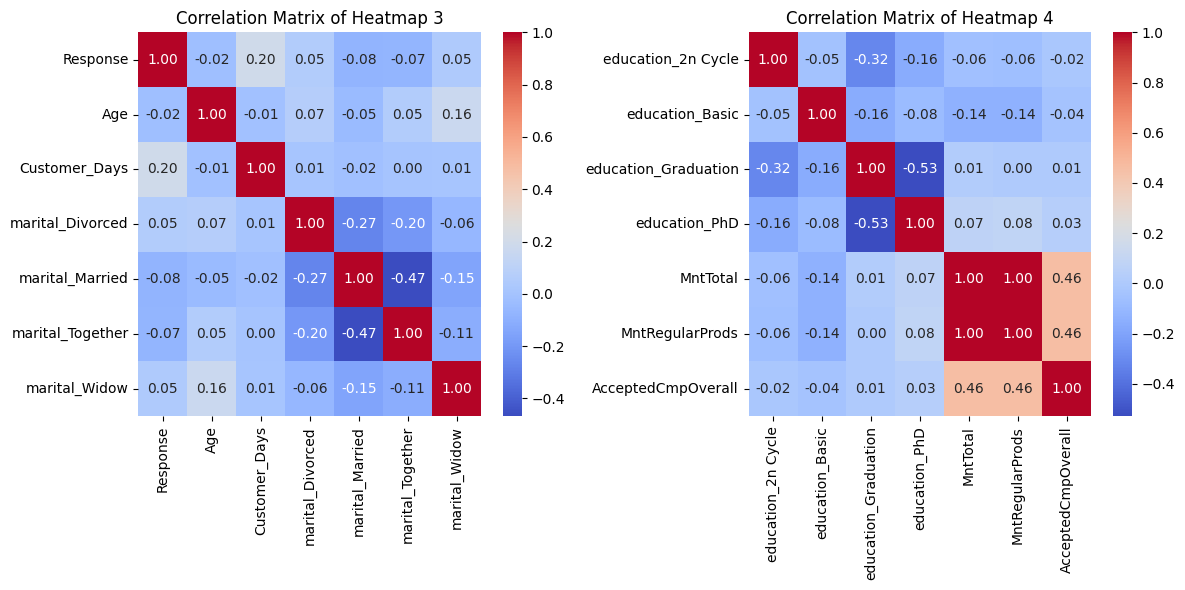

In [24]:
# This is for Heatmap 3 and 4

fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix of Heatmap 3")

sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Matrix of Heatmap 4")

plt.tight_layout()
plt.show()

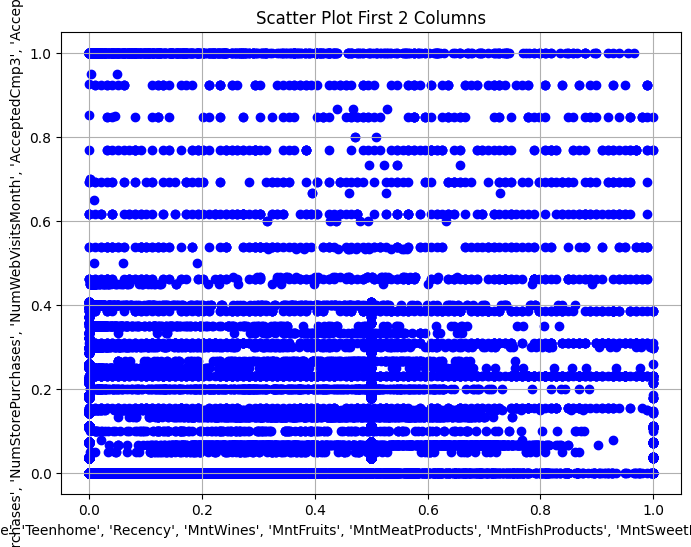

In [25]:
# Creating a Scatterplot for the first 2 columns created from the heatmap
x_column1 = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

y_column1 = ['NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

plt.figure(figsize=(8,6))

plt.scatter(ma[x_column1], ma[y_column1], c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot First 2 Columns')
plt.xlabel(x_column1)
plt.ylabel(y_column1)
plt.grid(True)

plt.show()

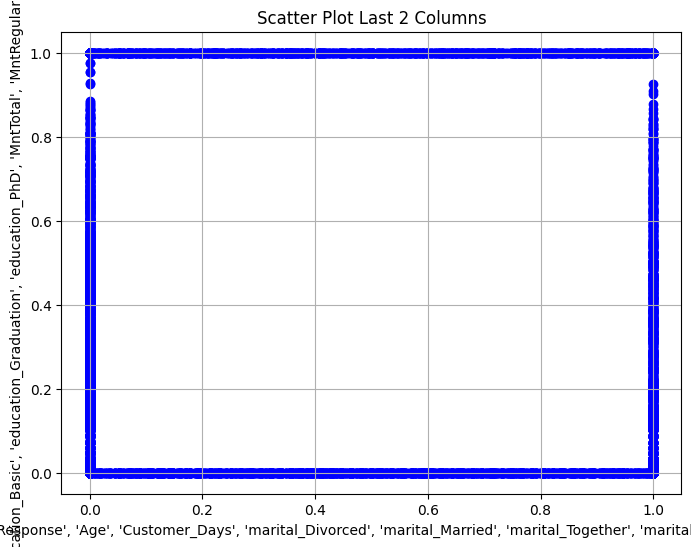

In [26]:
# Creating a Scatterplot for the Last 2 columns created from the heatmap
x_column2= ['Response', 'Age', 'Customer_Days',
    'marital_Divorced', 'marital_Married', 'marital_Together', 'marital_Widow']

y_column2 = ['education_2n Cycle','education_Basic', 'education_Graduation', 'education_PhD', 'MntTotal', 'MntRegularProds',
    'AcceptedCmpOverall']

plt.figure(figsize=(8,6))

plt.scatter(ma[x_column2], ma[y_column2], c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot Last 2 Columns')
plt.xlabel(x_column2)
plt.ylabel(y_column2)
plt.grid(True)

plt.show()

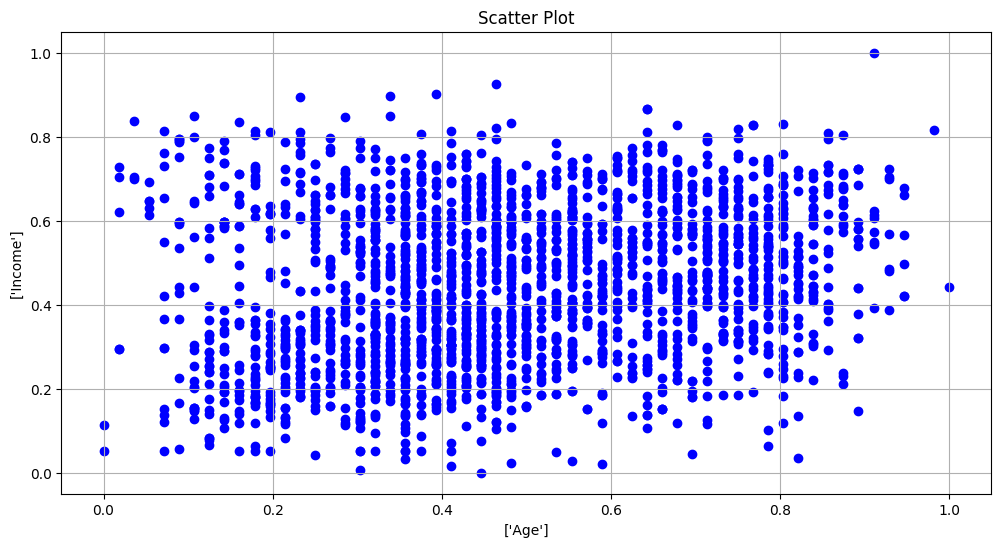

In [27]:
# From these scatter plots we can see that important attributes would be:
# Majority of the attributes from the first scatter plot, and Age for the second.
# We can then make a more concise scatter plot

y_true = ['Income']

x_true = ['Age']

# Works: Age, MntFishProducts, MntMeatProducts, MntSweetProducts, MntFruits, MntWines, Recency
# Not Work: AcceptedCmp1,2,3,4, marital: divorced, together, married,

plt.figure(figsize=(12,6))

plt.scatter(ma[x_true], ma[y_true], c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot')
plt.xlabel(x_true)
plt.ylabel(y_true)
plt.grid(True)

plt.show()

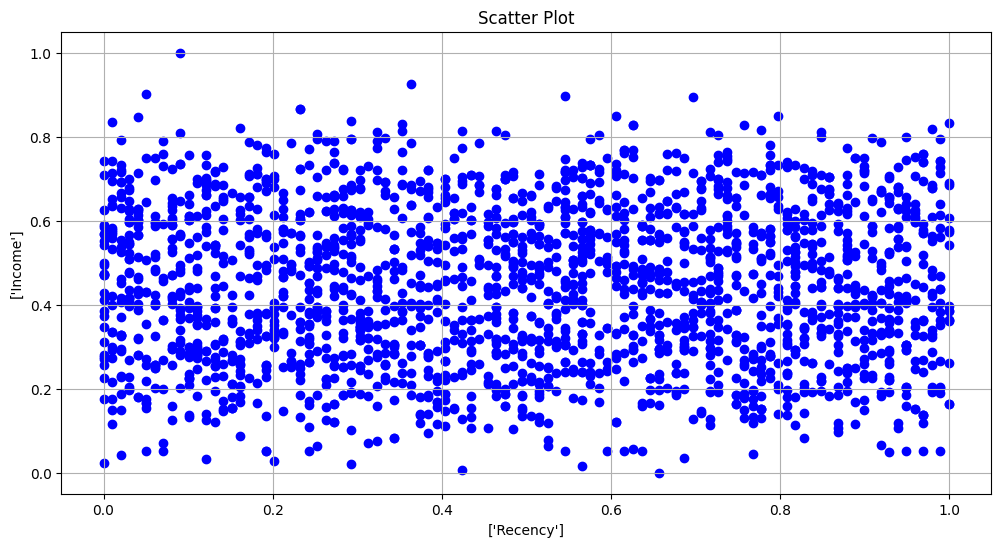

In [28]:
# Income - Recency Coorelation
y_true = ['Income']

x_true = ['Recency']

plt.figure(figsize=(12,6))

plt.scatter(ma[x_true], ma[y_true], c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot')
plt.xlabel(x_true)
plt.ylabel(y_true)
plt.grid(True)

plt.show()

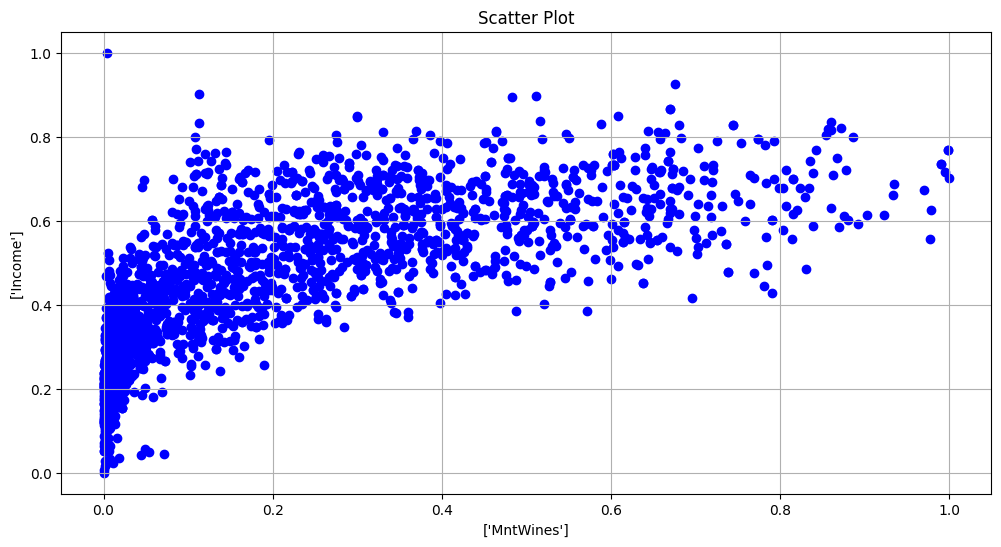

In [29]:
# Income - MntWines Coorelation
y_true = ['Income']

x_true = ['MntWines']

plt.figure(figsize=(12,6))

plt.scatter(ma[x_true], ma[y_true], c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot')
plt.xlabel(x_true)
plt.ylabel(y_true)
plt.grid(True)

plt.show()

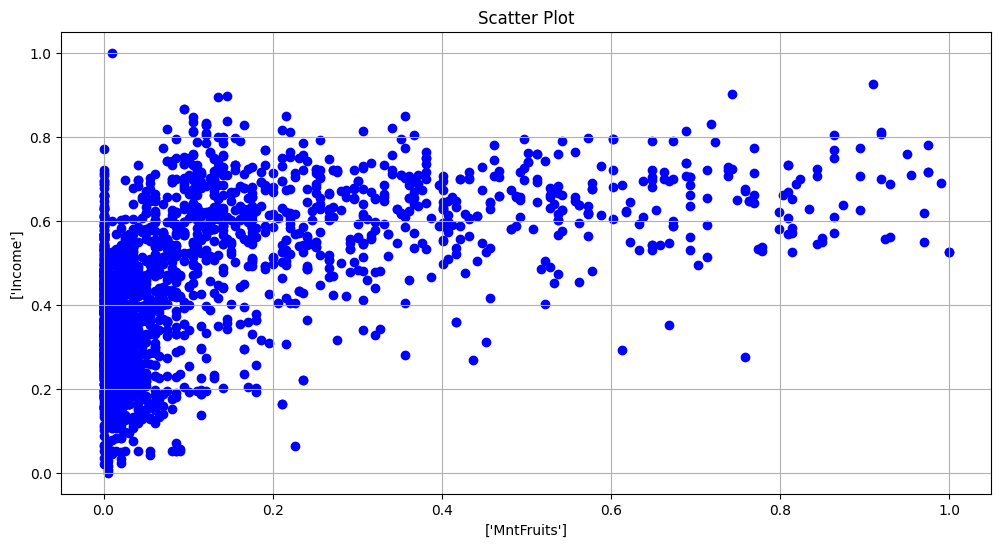

In [30]:
# Income - MntFruits Coorelation
y_true = ['Income']

x_true = ['MntFruits']

plt.figure(figsize=(12,6))

plt.scatter(ma[x_true], ma[y_true], c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot')
plt.xlabel(x_true)
plt.ylabel(y_true)
plt.grid(True)

plt.show()

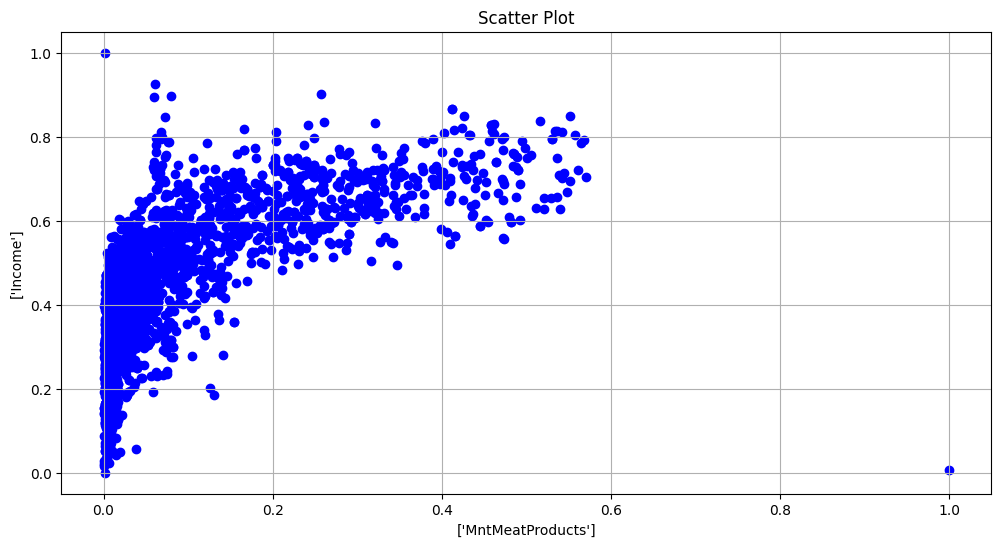

In [31]:
# Income - MntMeatProducts Coorelation
y_true = ['Income']

x_true = ['MntMeatProducts']

plt.figure(figsize=(12,6))

plt.scatter(ma[x_true], ma[y_true], c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot')
plt.xlabel(x_true)
plt.ylabel(y_true)
plt.grid(True)

plt.show()

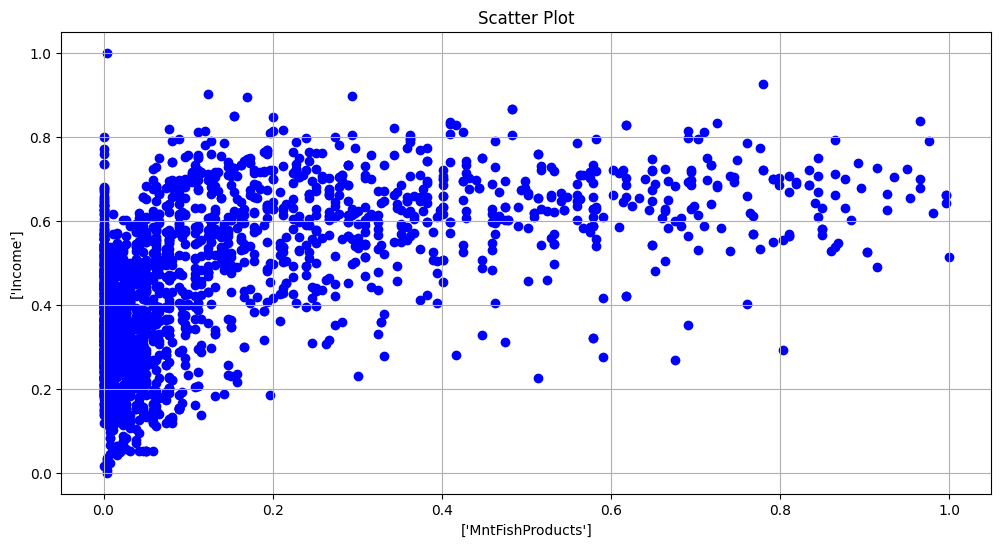

In [32]:
# Income - MntFishProducts Coorelation
y_true = ['Income']

x_true = ['MntFishProducts']

plt.figure(figsize=(12,6))

plt.scatter(ma[x_true], ma[y_true], c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot')
plt.xlabel(x_true)
plt.ylabel(y_true)
plt.grid(True)

plt.show()

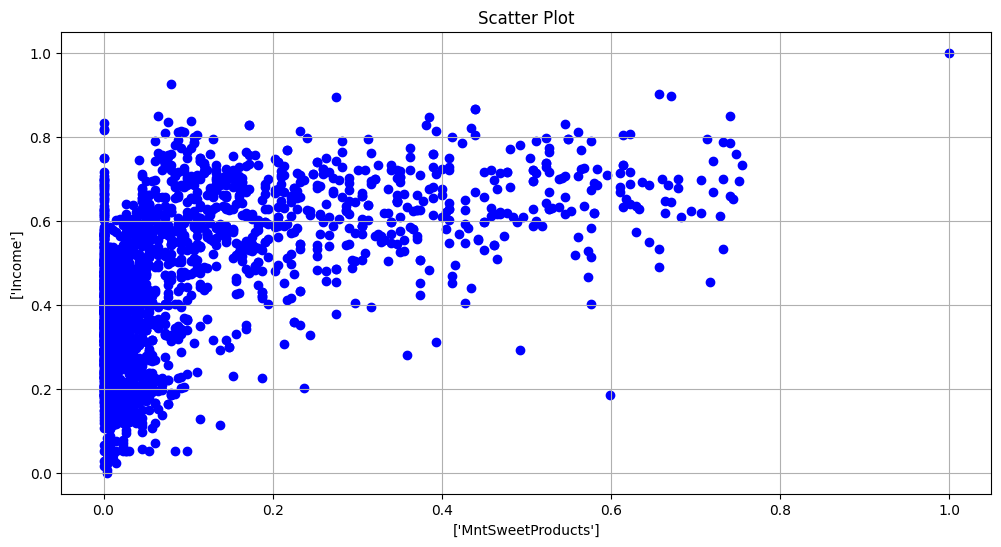

In [33]:
# Income - MntSweetProducts Coorelation
y_true = ['Income']

x_true = ['MntSweetProducts']

plt.figure(figsize=(12,6))

plt.scatter(ma[x_true], ma[y_true], c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot')
plt.xlabel(x_true)
plt.ylabel(y_true)
plt.grid(True)

plt.show()

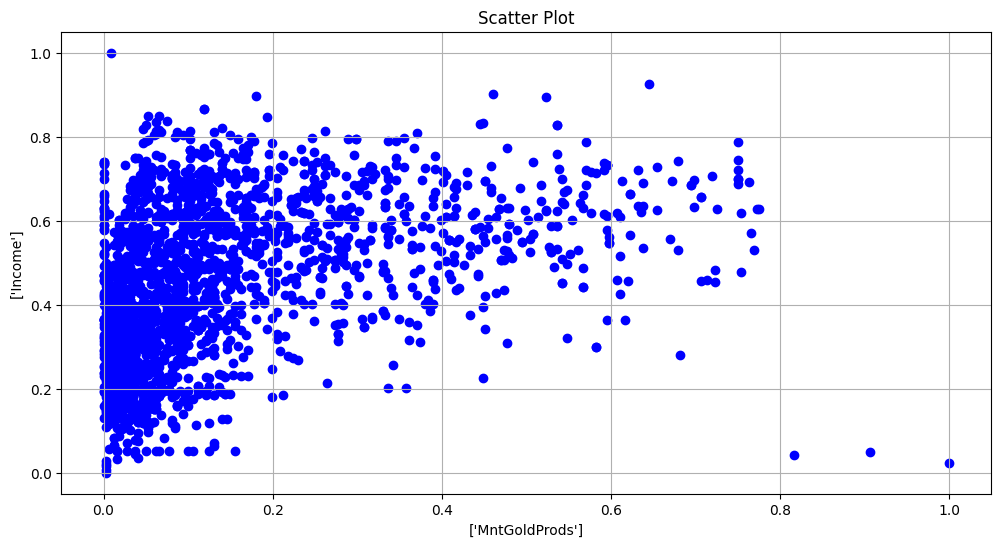

In [34]:
# Income - MntGoldProds Coorelation
y_true = ['Income']

x_true = ['MntGoldProds']

plt.figure(figsize=(12,6))

plt.scatter(ma[x_true], ma[y_true], c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot')
plt.xlabel(x_true)
plt.ylabel(y_true)
plt.grid(True)

plt.show()

<ipython-input-35-0bbaee0139b4>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, len(independent_variables) + 1)
<ipython-input-35-0bbaee0139b4>:21: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


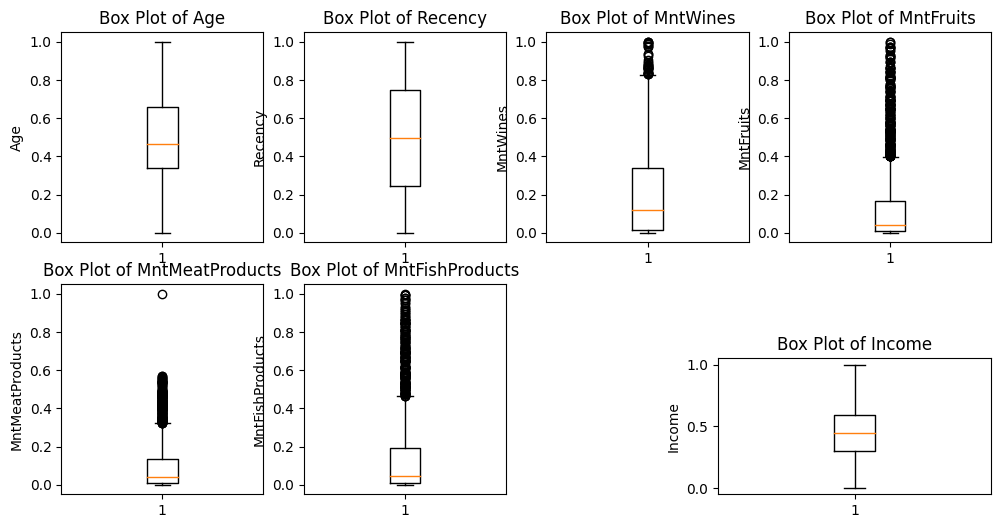

In [35]:
# Create a list of the column names for the independent variables
independent_variables = ['Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a box plot for each independent variable
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

# Iterate through the independent variables and create box plots for each
for i, var in enumerate(independent_variables):
    plt.subplot(2, 4, i + 1)  # Create a subplot for each variable
    plt.boxplot(ma[var])
    plt.title(f'Box Plot of {var}')
    plt.ylabel(var)

# Create a box plot for the dependent variable (Income)
plt.subplot(3, 3, len(independent_variables) + 1)
plt.boxplot(ma['Income'])
plt.title('Box Plot of Income')
plt.ylabel('Income')

# Adjust layout for better visualization
plt.tight_layout()

# Show the box plots
plt.show()

In [36]:
# Moving onto the test split and training test splits

Y = ma["Income"].values
X = ma[['Age', 'Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].values


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1764, 8)
(441, 8)
(1764,)
(441,)


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

min_max_scaler = MinMaxScaler()

# Fit and transform the training data
X_train_normalized = min_max_scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = min_max_scaler.transform(X_test)


In [38]:
X_train_scaled

array([[-0.86139362, -1.35824833, -0.89319478, ..., -0.42273882,
        -0.5614958 , -0.71883238],
       [-2.23510667,  0.54913433, -0.89613833, ..., -0.66007532,
        -0.65697281, -0.77657816],
       [ 1.37089009,  0.65317338, -0.88730769, ..., -0.66007532,
        -0.65697281, -0.81507535],
       ...,
       [-0.60382242, -1.49696707, -0.88142059, ..., -0.62356201,
        -0.53762654, -0.71883238],
       [-0.34625123, -0.28317811,  0.26656292, ...,  0.36229729,
        -0.46601878, -0.1028774 ],
       [-0.43210829, -0.80337338, -0.61944487, ...,  0.19798741,
        -0.41828027,  1.18677834]])

In [39]:
from sklearn.model_selection import GridSearchCV
results = []

param_grid = {
    'loss': ['squared_epsilon_insensitive', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.02],
    'max_iter': [100000],
    'learning_rate': ['constant'],
    'epsilon': [0.1, 0.01, 0.001],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Create the SGDRegressor model
sgd_reg = SGDRegressor()

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=sgd_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on training and test sets
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
r2 = r2_score(Y_test, Y_test_pred)

# Append results to the list
results.append({
    'Loss': best_params['loss'],
    'Penalty': best_params['penalty'],
    'Alpha': best_params['alpha'],
    'Max_Iter': best_params['max_iter'],
    'Learning_Rate': best_params['learning_rate'],
    'Epsilon': best_params['epsilon'],
    'Tol': best_params['tol'],
    'Train_MSE': train_mse,
    'Test_MSE': test_mse,
    'R-squared': r2
})

# Output the best hyperparameters and results
print("Best Hyperparameters:", best_params)
print("Training Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("R-squared:", r2)
results_df = pd.DataFrame(results)
print(results_df)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'alpha': 0.02, 'epsilon': 0.1, 'learning_rate': 'constant', 'loss': 'epsilon_insensitive', 'max_iter': 100000, 'penalty': 'elasticnet', 'tol': 0.0001}
Training Mean Squared Error: 0.012558600810146524
Test Mean Squared Error: 0.012766210560584575
R-squared: 0.5984363814045348
                  Loss     Penalty  Alpha  Max_Iter Learning_Rate  Epsilon  \
0  epsilon_insensitive  elasticnet   0.02    100000      constant      0.1   

      Tol  Train_MSE  Test_MSE  R-squared  
0  0.0001   0.012559  0.012766   0.598436  


In [40]:
#Parameters tuned

param_grid = {
    'loss': ['squared_epsilon_insensitive', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.001,0.01,0.02],
    'max_iter': [10000,20000,30000],
    'learning_rate': ['constant','optimal','invscaling'],
    'epsilon': [0.1, 0.01, 0.001],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Create the SGDRegressor model
sgd_reg = SGDRegressor()

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=sgd_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on training and test sets
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
r2 = r2_score(Y_test, Y_test_pred)

# Append results to the list
results.append({
    'Loss': best_params['loss'],
    'Penalty': best_params['penalty'],
    'Alpha': best_params['alpha'],
    'Max_Iter': best_params['max_iter'],
    'Learning_Rate': best_params['learning_rate'],
    'Epsilon': best_params['epsilon'],
    'Tol': best_params['tol'],
    'Train_MSE': train_mse,
    'Test_MSE': test_mse,
    'R-squared': r2
})

# Output the best hyperparameters and results
print("Best Hyperparameters:", best_params)
print("Training Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("R-squared:", r2)
results_df = pd.DataFrame(results)
print(results_df)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters: {'alpha': 0.001, 'epsilon': 0.001, 'learning_rate': 'constant', 'loss': 'squared_epsilon_insensitive', 'max_iter': 10000, 'penalty': 'elasticnet', 'tol': 1e-05}
Training Mean Squared Error: 0.010158357859301423
Test Mean Squared Error: 0.01136960311558945
R-squared: 0.6423669382998716
                          Loss     Penalty  Alpha  Max_Iter Learning_Rate  \
0          epsilon_insensitive  elasticnet  0.020    100000      constant   
1  squared_epsilon_insensitive  elasticnet  0.001     10000      constant   

   Epsilon      Tol  Train_MSE  Test_MSE  R-squared  
0    0.100  0.00010   0.012559  0.012766   0.598436  
1    0.001  0.00001   0.010158  0.011370   0.642367  


In [41]:
import statsmodels.api as sm
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X).fit()

# Output the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     638.9
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        07:18:34   Log-Likelihood:                 1918.7
No. Observations:                2205   AIC:                            -3819.
Df Residuals:                    2196   BIC:                            -3768.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2465      0.007     36.372      0.0